# Dimension and Information Loss

We measure dimensionality, information loss, and stability of nonlinear systems in various ways. 

TODO: 
1) Datasets: time series datasets (logistic map, chaotic attractors), image datasets (MNIST), manifold (swiss roll with extra dimensions)
2) Embedding algos: takens (TS), PCA, MLP-AE, CNN-AE, etc.
3) measure I(X,Y), reconstruciton loss (MSE/NMSE), loss in predictive power (f(x) vs. f(x_compressed)), etc. 

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import nbimporter
%run random_shannon_fcns.ipynb

In [155]:
# helper functions: 
def plot_delay(data, tau): 
    x = data[:-tau]  
    y = data[tau:]  
    
    plt.scatter(x, y, s=1, alpha=0.7)  
    plt.xlabel(f'x(t)')
    plt.ylabel(f'x(t+{tau})')
    plt.title(f'Delay Embedding (τ={tau})')
    plt.show()

def L2_matrix(X):
    X_norm = np.sum(X**2, axis=1, keepdims=True)
    
    return np.sqrt(X_norm + X_norm.T - 2 * X @ X.T)
    
# another good value for r is 0.1 * max(d(x_i, x_j))
def recurrence_mat(data, r = np.std(data)/5):

def plot_recurrence(data, r = np.std(data)/5): 
    

def calculate_pca_loss_to_dim(X, pca, dim_min, dim_max): 
    pca_recon_loss_list = []
    for i in range(dim_min, dim_max+1): 
        loss, _, _ = pca_recon_loss(X, pca, i)
        pca_recon_loss_list.append(loss)

    return pca_recon_loss_list

def calculate_pca_feature_loss_to_dim(X, pca, dim_min, dim_max): 
    N = dim_max - dim_min + 1
    k = X.shape[1]
    feature_loss_mat = np.zeros((N, k))
    for i in range(N): 
        _, feature_loss, _ = pca_recon_loss(X, pca, i+dim_min)
        feature_loss_mat[i] = feature_loss

    return feature_loss_mat

def plot_pca_recon_loss(X, pca, dim_min, dim_max): 
    res = calculate_pca_loss_to_dim(X, pca, dim_min, dim_max)

    plt.title("PCA Reconstruction Loss (MSE) vs. Dimension")
    plt.xlabel("Dimension")
    plt.ylabel("MSE")
    plt.plot(np.arange(dim_min, dim_max+1), res, '.')
    plt.show()

SyntaxError: expected ':' (3845398234.py, line 18)

In [76]:
def logistic_map(r, x_0, max_iter = 1000): 
    traj = [x_0]

    for i in range(1, max_iter): 
        x = r * traj[i-1] * (1-traj[i-1])
        traj.append(x)

    return traj

def weierstrass(x, a, b, max_n): 
    res = np.zeros_like(x, dtype=float)
    for i in range(max_n): 
        res += a**i * np.cos(b**i * np.pi * x)
    return res

## PCA on Time Series Data

### Logistic Map

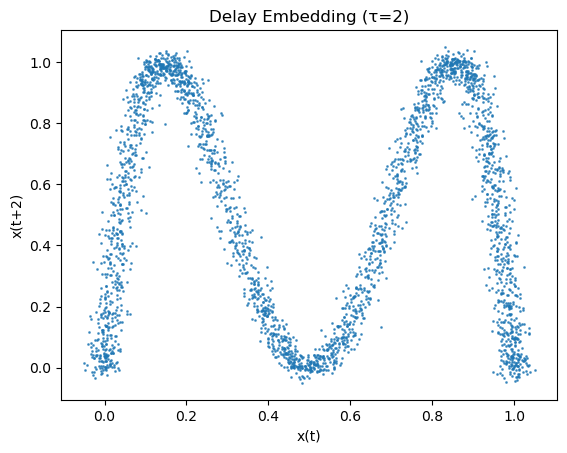

In [61]:
mu, sig = 0, 0.02
N = 3000
lgm = logistic_map(4.0, 0.3, N) + np.random.normal(mu, sig, N)
plot_delay(lgm, 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


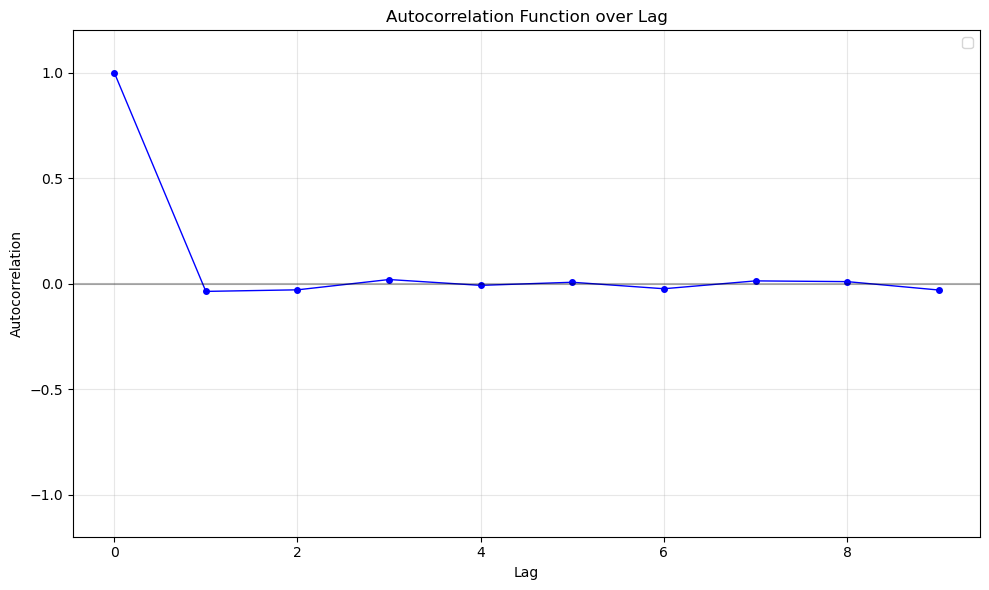

[1.0,
 -0.037258545352505494,
 -0.02985720175319718,
 0.018952069850509054,
 -0.008667920015616452,
 0.006014419771856601,
 -0.02470576968649624,
 0.012510920702341041,
 0.00904897538170099,
 -0.030784362775914433]

In [103]:
plot_acf(lgm, 10)

In [62]:
lgm_embedded.shape
r2_dim2.shape

(20,)

In [87]:
dim, delay = 20, 1
lgm_embedded = delay_embed(lgm, dim, delay)
lgm_delaypca, pca_lgm = delayPCA(lgm, dim, delay, dim)

lgm_pca_recon_loss = calculate_pca_loss_to_dim(lgm_embedded, pca_lgm, 2, dim)
lgm_pca_feature_loss = calculate_pca_feature_loss_to_dim(lgm_embedded, pca_lgm, 2, dim)

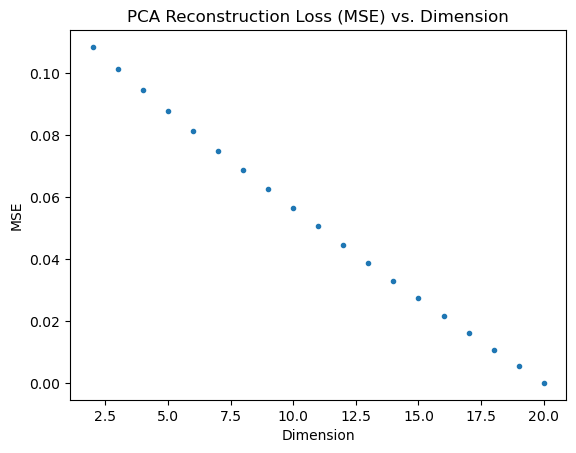

In [88]:
plot_pca_recon_loss(lgm_embedded, pca_lgm, 2, dim)

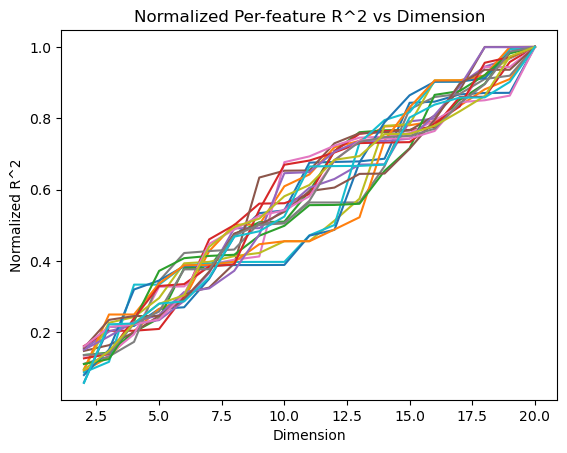

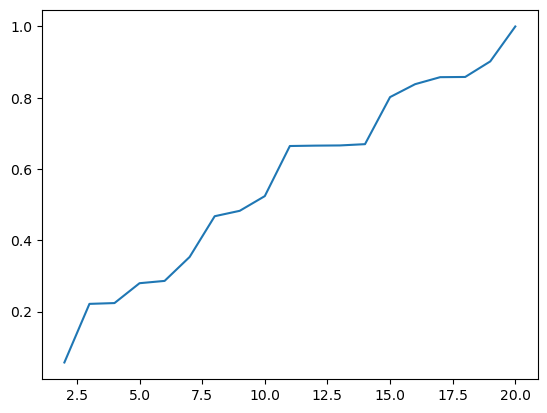

In [84]:
k_feat = 19

plt.title("Normalized Per-feature R^2 vs Dimension")
plt.plot(np.arange(2, dim+1), lgm_pca_feature_loss[:, :20])
plt.xlabel('Dimension')
plt.ylabel('Normalized R^2')
plt.show()

plt.title("")
plt.plot(np.arange(2, dim+1), lgm_pca_feature_loss[:, k_feat])
plt.show()

### Weierstrass Function 

In [142]:
ts_length = 10000
x_val = np.linspace(-2*np.pi, 4*np.pi, ts_length)
a = 0.7
b = 2.0
max_n = 100

wire = weierstrass(x_val, a, b, max_n)

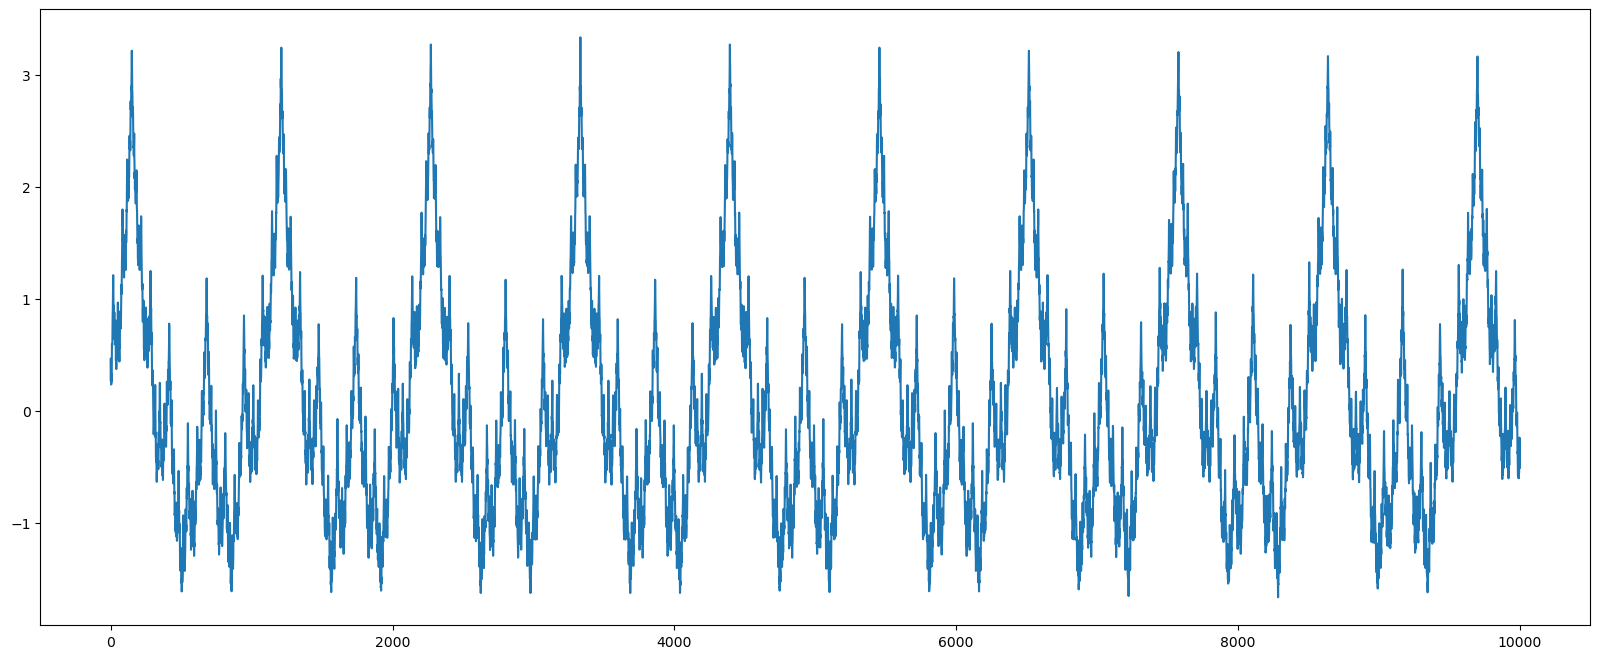

In [143]:
plt.figure(figsize=(20,8))
plt.plot(wire)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


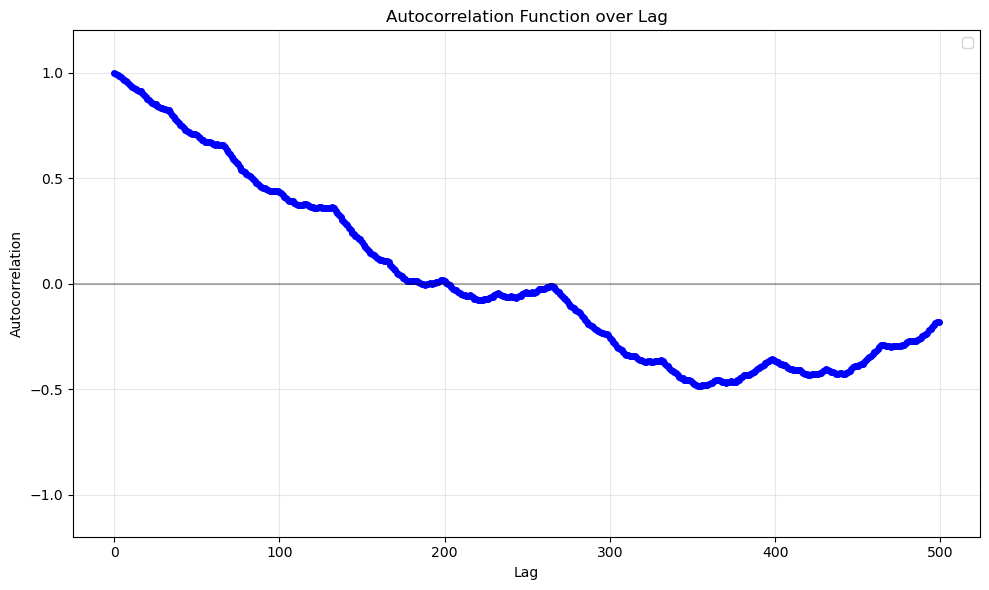

In [145]:
acf_wire = plot_acf(wire, 500)

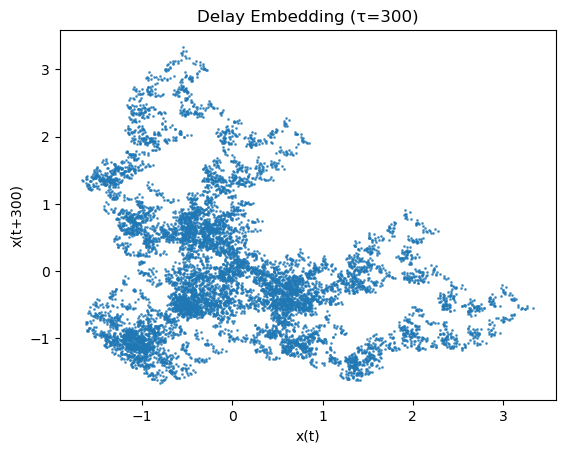

In [150]:
plot_delay(wire, 300)

### Test cross recon loss; take a time series, split it into disjoint subsets, then carry out experiments 
### measures system stability